**Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [5]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df.drop(columns=["availability", "area_type","society","balcony"],axis=1,inplace=True)

In [7]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [8]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df.shape

(13246, 5)

In [11]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [14]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df.drop(columns=["size"],axis=1,inplace=True)

In [16]:
df.shape

(13246, 5)

In [17]:
df[df.bhk>22]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [18]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [21]:
def convert_sqft_into_number(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1])) / 2
    try:
        return float(x)
    except:
        return None

In [22]:
df1 = df.copy()

df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_into_number)

In [23]:
df1.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [24]:
df2 = df1.copy()

In [25]:
df2['price_per_sqft'] = df2['price']*100000 / df2['total_sqft']
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [26]:
df2['location'].value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [27]:
df2['location'] = df2['location'].apply(lambda x: x.strip())
df2.location.value_counts()

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [28]:
len(df2.location.unique())

1293

In [29]:
df2[ (df2.total_sqft / df2.bhk < 300) ].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Gandhi Bazar,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Double Road,500.0,3.0,100.0,3,20000.000000


In [30]:
df3 = df2[ ~(df2.total_sqft / df2.bhk < 300) ]
df3.shape

(12502, 6)

In [31]:
df3.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
def remove_outlier_from_price_per_sqft(df):
    df_out = pd.DataFrame()
    for key,sub in df.groupby('location'):
        m = np.mean( sub.price_per_sqft )
        st = np.std( sub.price_per_sqft )
        reduce_df = sub[( sub.price_per_sqft>(m-st) ) & ( sub.price_per_sqft<=(m+st) ) ]
        df_out = pd.concat( [df_out, reduce_df],ignore_index=True )
    return df_out

In [33]:
df4 = remove_outlier_from_price_per_sqft(df3)
df4.shape

(9267, 6)

In [34]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,9267.000000,9267.000000,9267.000000,9267.000000,9267.000000
mean,1504.603273,2.463149,94.140067,2.556707,5724.437494
std,894.614947,0.952020,110.642802,0.847092,2535.271814
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1109.000000,2.000000,49.000000,2.000000,4259.259259
50%,1282.000000,2.000000,67.000000,2.000000,5185.185185
75%,1650.000000,3.000000,100.000000,3.000000,6404.356285
max,30400.000000,14.000000,2912.000000,10.000000,35000.000000


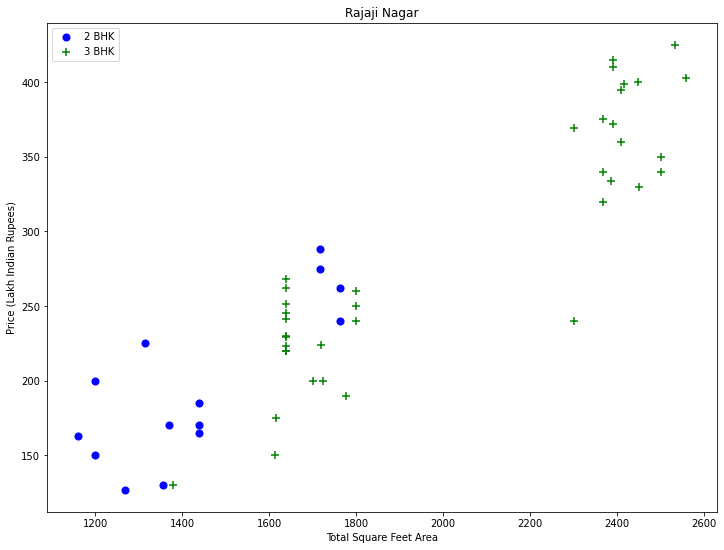

In [35]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (12,9)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar")

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(7504, 6)

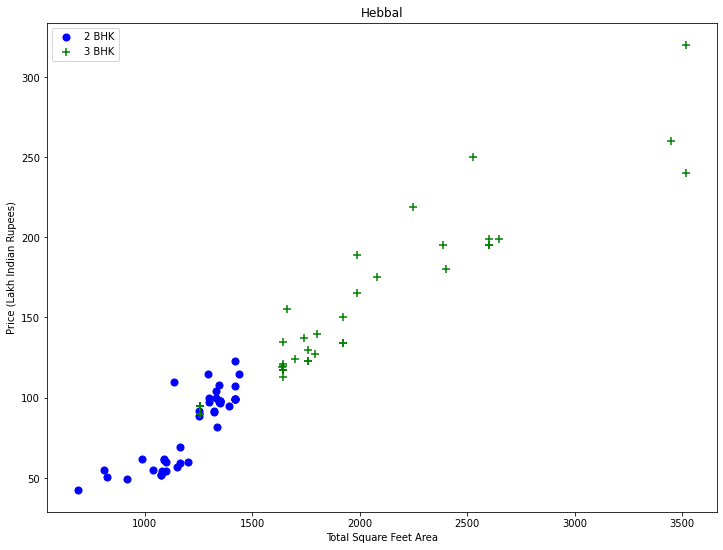

In [37]:
plot_scatter_chart(df5,"Hebbal")

In [38]:
df5.bath.unique()

array([ 3.,  1.,  4.,  2.,  5.,  8.,  9.,  6., 14.,  7., 12.])

In [39]:
df5[df5.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
757,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
6183,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000


Text(0, 0.5, 'Count')

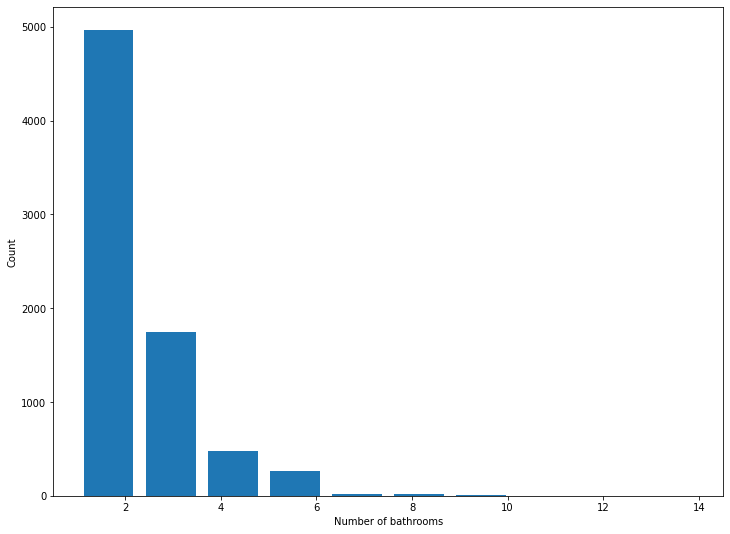

In [40]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [41]:
df5[(df5.bath > df5.bhk+2)]

,location,total_sqft,bath,price,bhk,price_per_sqft
757,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
1951,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
6117,Nagasandra,7000.0,8.0,450.0,4,6428.571429
7431,Sathya Sai Layout,11338.0,9.0,1000.0,6,8819.897689
7914,Thanisandra,1806.0,6.0,116.0,3,6423.034330


In [42]:
df6 = df5[~(df5.bath > df5.bhk+2)]
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block BEL Layout,1540.0,3.0,85.0,3,5519.480519
1,1st Block HBR Layout,600.0,1.0,45.0,1,7500.000000
2,1st Block HBR Layout,3150.0,4.0,150.0,4,4761.904762
3,1st Block HRBR Layout,2300.0,3.0,80.0,3,3478.260870
4,1st Block HRBR Layout,1250.0,2.0,67.0,2,5360.000000


In [43]:
df6.shape

(7499, 6)

In [44]:
df7 = df6.drop(['price_per_sqft'],axis='columns')
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block BEL Layout,1540.0,3.0,85.0,3
1,1st Block HBR Layout,600.0,1.0,45.0,1
2,1st Block HBR Layout,3150.0,4.0,150.0,4
3,1st Block HRBR Layout,2300.0,3.0,80.0,3
4,1st Block HRBR Layout,1250.0,2.0,67.0,2


In [45]:
dummy_df = pd.get_dummies(df7.location)
dummy_df.head()

,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
final_df = pd.concat([df7.drop("location", axis = 1), dummy_df.drop("1st Block Jayanagar", axis = 1)], axis = 1)
final_df.head()

,total_sqft,bath,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1540.0,3.0,85.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,1.0,45.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3150.0,4.0,150.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2300.0,3.0,80.0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,67.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
final_df.shape

(7499, 764)

In [48]:
x = final_df.drop('price',axis=1)
y = final_df['price']

In [49]:
x.shape

(7499, 763)

In [50]:
y.shape

(7499,)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5999, 763), (1500, 763), (5999,), (1500,))

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

-635093389897887.0

In [54]:
pred = lr.predict(X_test)
pred

array([447.77969574,  56.04668994,  37.98843485, ...,  58.35012173,
       211.9067724 ,  41.17651167])

In [55]:
y_test

6450    600.00
5073     52.00
4683     37.00
4721     50.00
5673     86.58
         ...  
3516    118.00
1985     59.00
340      65.00
4359     95.00
3813     46.00
Name: price, Length: 1500, dtype: float64

In [56]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr.predict([X])[0]

In [57]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

86.16926456461407

In [58]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

78.39155321701865

In [59]:
predict_price('Indira Nagar',1400, 2, 3)

197.21350106134918

In [60]:
import joblib
joblib.dump(lr, "banglore house price prediction model.pkl")

['banglore house price prediction model.pkl']